# 넘파이 API - 합곱차와 통계값

## ndarray의 합곱차 구하기

In [1]:
# numpy.cumsum(a, axis=None, dtype=None, out=None)
# ndarray.cumsum(axis=None, dytpe=None, out=None)
import numpy as np
a = np.arange(5)
print(a, '\n')

cumsum = np.cumsum(a)
print('cumsum : ', cumsum) # 누적시키면서 구하기 
                           # cumsum은 scalar값을 돌려주지 않음. 

[0 1 2 3 4] 

cumsum :  [ 0  1  3  6 10]


In [3]:
a = np.arange(3*3).reshape(3,3)
print(a, '\n')
cumsum=np.cumsum(a)
print('cumsum : ', cumsum)
cumsum_axis_0 = np.cumsum(a, axis=0)
print('cumsum_axis_0 :\n', cumsum_axis_0)
cumsum_axis_1 = np.cumsum(a, axis=1)
print('cumsum_axis_1 :\n', cumsum_axis_1)

[[0 1 2]
 [3 4 5]
 [6 7 8]] 

cumsum :  [ 0  1  3  6 10 15 21 28 36]
cumsum_axis_0 :
 [[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
cumsum_axis_1 :
 [[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]]


In [7]:
cumsum = np.cumsum(a, axis=0)[::-1, :] # accumulation의 방향만 바꾸기
print(cumsum_axis_0)

[[ 9 12 15]
 [ 3  5  7]
 [ 0  1  2]]


In [22]:
# product
# numpy.product(a, axis=None, dtype=None, out=None, keepdims=)
a =np.arange(1,1+12).reshape(3,4)
print(a, '\n')

prod = np.prod(a)
cumprod = np.cumprod(a)
print(prod)
print(cumprod)
print('-'*40)

print(np.prod(a, axis=0)) # (4, )
print(np.prod(a, axis=0, keepdims=True)) # (4, 1)
print(np.cumprod(a, axis=0)) # (3,4)
print('-'*40)

print(np.prod(a, axis=1)) # (3, )
print(np.cumprod(a, axis=1)) # (3,4)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

479001600
[        1         2         6        24       120       720      5040
     40320    362880   3628800  39916800 479001600]
----------------------------------------
[ 45 120 231 384]
[[ 45 120 231 384]]
[[  1   2   3   4]
 [  5  12  21  32]
 [ 45 120 231 384]]
----------------------------------------
[   24  1680 11880]
[[    1     2     6    24]
 [    5    30   210  1680]
 [    9    90   990 11880]]


In [23]:
# np.diff
import numpy as np
a = np.random.randint(0,10, (5,))
print(a, '\n')

diff = np.diff(a)
print(diff.shape, diff) # (4,) a[n+1] - a[n]
# 결과가 하나 줄어들게 된다. 혹은 맨 앞에 0을 집어넣어주어 줄어드는 것을 방지한다. 

[4 2 6 0 3] 

(4,) [-2  4 -6  3]


In [25]:
a = np.random.randint(0,10,(4,4))
print(a.shape, a)
print('-'*40)

diff = np.diff(a,axis=0)
print(diff.shape, diff) # 컬럼이 하나 줄어들고 행 하나가 줄어들고 

(4, 4) [[1 7 3 6]
 [6 3 9 4]
 [2 5 5 3]
 [4 2 7 8]]
----------------------------------------
(3, 4) [[ 5 -4  6 -2]
 [-4  2 -4 -1]
 [ 2 -3  2  5]]


## statistics

In [26]:
# np.mean 
# mean vs. average
# average ==> mean보다는 좀더 넓은 의미를 가지고 있음. (무게 중심)
# weight(가중치)가 들어간 것이 average 
# 1 2 3 4 5
# .1 .2 .3 .2 .2 => 1 (가중치)
# 이렇게 곱하고 더한 것의 평균을 구하는 것이 average

import numpy as np
np.random.seed(0)

x = np.random.randint(1,10,(5,))
w = np.array([1,2,3,4,5])

print(np.average(x, weights=w))
print(np.sum(w*x)/np.sum(w))

5.066666666666666
5.066666666666666


In [31]:
# numpy.median
x = np.arange(9)
print(x, '\n')
median = np.median(x)
print('홀수개 숫자 중간값: ',median)
print('-'*40)

x = np.arange(10)
print(x, '\n')
print('짝수개 숫자 중간값 : ', np.median(x))

[0 1 2 3 4 5 6 7 8] 

홀수개 숫자 중간값:  4.0
----------------------------------------
[0 1 2 3 4 5 6 7 8 9] 

짝수개 숫자 중간값 :  4.5


In [34]:
x =np.random.randint(1,10,(100,))
mean = np.mean(x)
median = np.median(x)
print(mean,'/', median)

x = np.append(x, 1000)
print(np.mean(x), '/', np.median(x)) # 중간값은 크게 변하지 않음. 

4.83 / 5.0
14.683168316831683 / 5.0


In [40]:
# numpy.var
# numpy.std

scores = np.random.normal(loc=10, scale=5, size=(100,))
var = scores.var() # scale 제곱
std = scores.std() # scale
print(var, std)

24.061935154129145 4.905296642826929


In [53]:
# standardization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

means = [50, 60, 70]
stds = [3,5,10]
n_student, n_class = 100, 3
scores = np.random.normal(
    loc=means,
    scale=stds,
    size=(n_student, n_class)
)
scores = scores.astype(np.float32)
print(scores.shape, scores.dtype) # 중간중간에 계속 확인하기 

means = scores.mean(axis=0) # (3,) 각 과목별 평균
stds = scores.std(axis=0) # (3,) 각 과목별 std

print('means before stdz:', means)
print('stds before stdz:', stds)
print('-'*40)

# broadcasting 가능
# 아니면 keepdims=True를 넣어주도 됨
score_stdz = (scores - means)/stds # standardization
means_stdz = score_stdz.mean(axis=0)
stds_stdz = score_stdz.std(axis=0)

print('means after stdz: ', means_stdz)
print('stds after stdz: ', stds_stdz)

# sns.displot(scores, kind='kde')

(100, 3) float32
means before stdz: [50.14153  60.381104 67.612946]
stds before stdz: [2.9854004 4.945724  9.883386 ]
----------------------------------------
means after stdz:  [2.0495056e-06 3.4332277e-07 6.1392785e-07]
stds after stdz:  [0.9999998 0.9999998 1.0000001]


## 최댓값, 최솟값

In [54]:
# numpy.amax
# numpy.argmax

a = np.random.randint(0,100,(10,))

M = np.max(a)
M_idx = np.argmax(a)

print(a, '\n')
print(M)
print(M_idx) # 최댓값의 인덱스 

[32 32 28 12 93 74 55 73 49 19] 

93
4


In [56]:
means = [50, 60, 70]
stds = [3,5,10]
n_student, n_class = 100, 3
scores = np.random.normal(
    loc=means,
    scale=stds,
    size=(n_student, n_class)
)
scores = scores.astype(np.float32)

scores_max = np.max(scores, axis=0)
scores_max_idx = np.argmax(scores, axis=0) # 최댓값을 맞은 학생의 index 

print('max scores : ', scores_max)
print('max indices : ', scores_max_idx) # 데이터 포인트의 인덱스를 가지고 올 수 있음. 

max scores :  [57.66335  72.482086 96.00672 ]
max indices :  [11 92  2]


In [58]:
means = [50, 60, 70]
stds = [3,5,10]
n_student, n_class = 100, 3
scores = np.random.normal(
    loc=means,
    scale=stds,
    size=(n_student, n_class)
)
scores = scores.astype(np.float32)

scores_max = np.max(scores, axis=1)
scores_max_idx = np.argmax(scores, axis=1) # 학생마다 가장 잘본 과목

print('max indices : ', scores_max_idx) # 2의 평균이 가장 크기 때문에 2의 값이 가장 많이 나타남.


max scores :  (100,)
max indices :  [2 2 2 1 2 1 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2
 2 2 2 1 1 2 1 2 2 1 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2]


In [60]:
# MinMaxNormalization

means = [50, 60, 70]
stds = [3,5,10]
n_student, n_class = 100, 3
scores = np.random.normal(
    loc=means,
    scale=stds,
    size=(n_student, n_class)
)
scores = scores.astype(np.float32)

scores_max = np.amax(scores, axis=0)
scores_min = np.amin(scores, axis=0)

scores_mM_norm = (scores-scores_min)/(scores_max - scores_min)
#                 (100,3)  (3,)         (3,)         (3,)

scores_max = np.amax(scores_mM_norm, axis=0)
scores_min = np.amin(scores_mM_norm, axis=0)
print(scores_max, scores_min) # minMax로 해주었을 때의 최소, 최대 결괏값 

[1. 1. 1.] [0. 0. 0.]


In [64]:
# np.maximum, np.minimum ==> 2개의 array를 비교
u = np.random.randint(0,10,(10,))
v = np.random.randint(0,10,(10,))
print(u)
print(v)
print('-'*40)

maximum = np.maximum(u,v) # 두 array를 비교
minimum = np.minimum(u,v)

print(maximum)
print(minimum)

[1 0 3 9 5 5 2 1 7 2]
[1 9 4 9 3 7 2 5 8 7]
----------------------------------------
[1 9 4 9 5 7 2 5 8 7]
[1 0 3 9 3 5 2 1 7 2]


In [74]:
# 직접 구현 
u = np.random.randint(0,10,(10,))
v = np.random.randint(0,10,(10,))
print(u)
print(v)
print('-'*40)

maximum = np.zeros_like(u)
maximum[u>=v] = u[u>=v] # boolean indexing 사용
maximum[u<v] = v[u<v]
print('maximum array : ', maximum)

[3 6 8 2 4 2 6 8 9 9]
[4 2 7 9 0 4 4 2 6 4]
----------------------------------------
maximum array :  [4 6 8 9 4 4 6 8 9 9]


In [78]:
# u가 더 큰 부분은 100으로 v가 더 큰 부분은 -100으로
u = np.random.randint(0,10,(10,))
v = np.random.randint(0,10,(10,))
print(u)
print(v)
print('-'*40)

up_vals = np.full_like(u, fill_value=100)
down_vals = np.full_like(u, fill_value=-100)

print(np.where(u>v, up_vals, down_vals)) # 원래는 만족시키는 index만 돌려주지만
                                         # 값을 변환할때도 사용이 가능. 

[3 4 5 2 7 6 2 9 3 8]
[8 3 0 8 9 6 7 4 0 1]
----------------------------------------
[-100  100  100 -100 -100 -100 -100  100  100  100]


In [80]:
# np.where 활용 
# max
u = np.random.randint(0,10,(10,))
v = np.random.randint(0,10,(10,))
print(u)
print(v)
print('-'*40)

print(np.where(u>v, u, v))


[6 2 4 9 4 0 2 0 9 3]
[5 6 4 7 9 9 5 6 7 7]
----------------------------------------
[6 6 4 9 9 9 5 6 9 7]


In [81]:
# np.where 활용 
# min
u = np.random.randint(0,10,(10,))
v = np.random.randint(0,10,(10,))
print(u)
print(v)
print('-'*40)

print(np.where(u>v, v, u)) # u, v ==> v, u


[4 0 4 7 9 6 3 7 3 8]
[3 9 4 9 8 8 1 2 5 5]
----------------------------------------
[3 0 4 7 8 6 1 2 3 5]


# 넘파이 API - Rounding과 정렬 (중반부)

## Rounding 함수

In [87]:
# numpy.around
# numpy.round_ 파이썬 안에서도 round를 제공하는데, 중복을 피하기 위해 round_
# ndarray.round 

x = np.random.uniform(-5,5,(5,))
np_around = np.around(x, decimals=2) # 반올림. 최종적으로 표기할 자리 
np_round = np.round(x, decimals=2)
x_round = x.round(decimals=2)
print(np_around, np_round, x_round, sep='\n')

[-1.1  -2.7  -4.04  0.71 -2.83]
[-1.1  -2.7  -4.04  0.71 -2.83]
[-1.1  -2.7  -4.04  0.71 -2.83]


In [89]:
# 정수를 만들어주는 API
# numpy.ceil 올림
# numpu.floor 내림

x =np.random.uniform(-5,5,(5,))
ceil = np.ceil(x)
floor = np.floor(x)

print(x)
print('-'*40)
print(ceil)
print('-'*40)
print(floor)

[ 1.61355384  3.60420833  3.69368927 -3.42604151 -0.32667348]
----------------------------------------
[ 2.  4.  4. -3. -0.]
----------------------------------------
[ 1.  3.  3. -4. -1.]


In [90]:
# numpy.trunc

x = np.random.uniform(-5,5,(5,))
trunc = np.trunc(x)
print(x)
print('-'*40)
print(trunc) # 그냥 소숫점 아래 날리기. 딥러닝에서 많이 이용됨

[ 3.94563657  2.299262    3.66386378 -1.13106988 -0.00987336]
----------------------------------------
[ 3.  2.  3. -1. -0.]


In [92]:
# np.trunc 구현 
x = np.random.uniform(-5,5,(5,))
trunc_where = np.where(x>=0, np.floor(x), np.ceil(x))
print(x)
print('-'*40)
print(trunc_where)

[ 1.13224816 -0.58396507  0.49021998  0.98148894  3.79058203]
----------------------------------------
[ 1. -0.  0.  0.  3.]


In [93]:
# trunc 구현 02
x = np.random.uniform(-5,5,(5,))
trunc = .1*np.trunc(10*x)
print(x)
print('-'*40)
print(trunc) # 소숫점 둘째자리까지 truncate 하고 싶을 때

[ 1.76871189  2.13754473  4.69926592 -4.32338243 -3.12386437]
----------------------------------------
[ 1.7  2.1  4.6 -4.3 -3.1]


In [94]:
# trunc 구현 03
x = np.random.uniform(-5,5,(5,))
int_part = np.trunc(x)
frac_part = x - int_part
print(x)
print('-'*40)
print(int_part, frac_part, sep='\n') # integer part, fraction part 따로 가져오기. 

[-1.81877707  4.46067344 -2.71444974  0.65094573 -3.8223887 ]
----------------------------------------
[-1.  4. -2.  0. -3.]
[-0.81877707  0.46067344 -0.71444974  0.65094573 -0.8223887 ]


## sorting

***vector sorting***

In [97]:
# numpy.sort
# numpy.argsort 데이터 포인트의 위치가 중요할 때
import numpy as np
# 오름차순 
x = np.random.randint(0,100,(10,))
sort = np.sort(x)
argsort = np.argsort(x)

print(x,sort, argsort, sep='\n')

[40 27 43  3 17 47 48 76 47 31]
[ 3 17 27 31 40 43 47 47 48 76]
[3 4 1 9 0 2 5 8 6 7]


In [98]:
# 내림차순
x = np.random.randint(0,100,(10,))
sort = np.sort(x)[::-1]
argsort = np.argsort(x)[::-1]

print(x,sort, argsort, sep='\n')

[15 81 11 41  1 22 55  5 67 17]
[81 67 55 41 22 17 15 11  5  1]
[1 8 6 3 5 9 0 2 7 4]


In [103]:
pred = np.random.uniform(0,100,(5,))
pred /= pred.sum()

top3_pred = np.sort(pred)[::-1][:3]
top3_indices = np.argsort(pred)[::-1][:3] # 인덱스를 돌려줌.

print(pred.round(3))
print(top3_pred.round(3))
print(top3_indices)

[0.013 0.087 0.091 0.552 0.257]
[0.552 0.257 0.091]
[3 4 2]


***matrices sorting***

In [105]:
x = np.random.randint(0,100,(4,5))

sort = np.sort(x,axis=0)
argsort = np.argsort(x, axis=0)

print(x)
print('-'*40)
print(sort)
print('-'*40)
print(argsort)


[[79 29 79  8 18]
 [95 72 59 94 47]
 [80  5 44 86 36]
 [46 13 15 72 31]]
----------------------------------------
[[46  5 15  8 18]
 [79 13 44 72 31]
 [80 29 59 86 36]
 [95 72 79 94 47]]
----------------------------------------
[[3 2 3 0 0]
 [0 3 2 3 3]
 [2 0 1 2 2]
 [1 1 0 1 1]]


In [106]:
x = np.random.randint(0,100,(4,5))

sort = np.sort(x,axis=0)[::-1, :] # 열마다 내림차순 
argsort = np.argsort(x, axis=0)[::-1, :] # 열마다 내림차순

print(x)
print('-'*40)
print(sort)
print('-'*40)
print(argsort)


[[89 45 21 80 34]
 [ 9  9 93 30 10]
 [35 56 46 94 27]
 [53 68 81 57 45]]
----------------------------------------
[[89 68 93 94 45]
 [53 56 81 80 34]
 [35 45 46 57 27]
 [ 9  9 21 30 10]]
----------------------------------------
[[0 3 1 2 3]
 [3 2 3 0 0]
 [2 0 2 3 2]
 [1 1 0 1 1]]


In [111]:
# column sorting
scores = np.random.randint(0,100,(5,3))
sort = np.sort(scores, axis=0)[::-1, :]
argsort = np.argsort(scores, axis=0)[::-1, :]
top_2_scores = sort[:2, :]
top_2_students = argsort[:2, :]

print(scores)
print(top_2_scores)
print(top_2_students)


[[22 28 88]
 [86  4 84]
 [84 62 93]
 [52 14 68]
 [87  3 57]]
[[87 62 93]
 [86 28 88]]
[[4 2 2]
 [1 0 0]]


In [112]:
scores = np.random.randint(0,100,(4,5))

sort_ascending = np.sort(x, axis=1)
argsort_ascending = np.argsort(x, axis=1)

sort_descending = np.sort(x, axis=1)[:, ::-1]
argsort_descending = np.argsort(x, axis=1)[:, ::-1]

print(x)
print('-'*40)
print(sort_ascending)
print(argsort_ascending)
print('-'*40)
print(sort_descending)
print(argsort_descending)

[[10 44 23]
 [81 39 61]
 [54 26 57]
 [89 50 91]
 [23 33 30]]
----------------------------------------
[[10 23 44]
 [39 61 81]
 [26 54 57]
 [50 89 91]
 [23 30 33]]
[[0 2 1]
 [1 2 0]
 [1 0 2]
 [1 0 2]
 [0 2 1]]
----------------------------------------
[[44 23 10]
 [81 61 39]
 [57 54 26]
 [91 89 50]
 [33 30 23]]
[[1 2 0]
 [0 2 1]
 [2 0 1]
 [2 0 1]
 [1 2 0]]


In [114]:
scores = np.random.randint(0,100,(5,3))

sort = np.sort(scores, axis=1)
argsort = np.argsort(scores, axis=1)

bottom2_scores = sort[:, :2]
bottom2_subjects = argsort[:, :2]

print(scores)
print('-'*40)
print(bottom2_scores)
print('-'*40)
print(bottom2_subjects)

[[73 96 50]
 [59 51 89]
 [83 62 99]
 [64 35 89]
 [40 46 62]]
----------------------------------------
[[50 73]
 [51 59]
 [62 83]
 [35 64]
 [40 46]]
----------------------------------------
[[2 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]


# 수학함수

## 삼각함수와 쌍곡선 함수

In [120]:
# constants 상수
import numpy as np
PI = np.pi # 3.14
E = np.e # 자연 상수
# 대문자로 표현함? ==> 수정이 되면 안되는 값. 

print(PI, E)
print('-'*40)

# numpy.rad2deg(x)
# numpy.deg2rad(x)
import numpy as np
degree = np.array([30,45,60,90,180,360])
rad = np.deg2rad(degree)
degree = np.rad2deg(rad)
print(rad)
print('-'*40)
print(degree)



3.141592653589793 2.718281828459045
----------------------------------------
[0.52359878 0.78539816 1.04719755 1.57079633 3.14159265 6.28318531]
----------------------------------------
[ 30.  45.  60.  90. 180. 360.]


In [126]:
# 삼각함수
# Trigonometric Functions

x = np.deg2rad(np.linspace(0,360,11))
sin,cos = np.sin(x),np.cos(x)
tan = np.tan(x)
print(x.round(2))
print('-'*40)
print(sin.round(2),cos.round(2),tan.round(2), sep='\n')
print((sin/cos).round(2))

[0.   0.63 1.26 1.88 2.51 3.14 3.77 4.4  5.03 5.65 6.28]
----------------------------------------
[ 0.    0.59  0.95  0.95  0.59  0.   -0.59 -0.95 -0.95 -0.59 -0.  ]
[ 1.    0.81  0.31 -0.31 -0.81 -1.   -0.81 -0.31  0.31  0.81  1.  ]
[ 0.    0.73  3.08 -3.08 -0.73 -0.    0.73  3.08 -3.08 -0.73 -0.  ]
[ 0.    0.73  3.08 -3.08 -0.73 -0.    0.73  3.08 -3.08 -0.73 -0.  ]


[  1.     2.72   7.39  20.09  54.6  148.41 403.43]
[  1.     2.72   7.39  20.09  54.6  148.41 403.43]


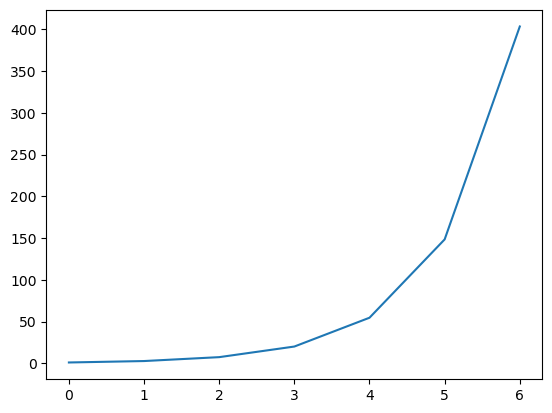

In [135]:
# 지수 함수
# numpy.exp()
# base는 자연 상수이다 ==> E = np.e

E = np.e
x = np.arange(7)

print((E**x).round(2))
print(np.exp(x).round(2))

plt.plot(np.exp(x))

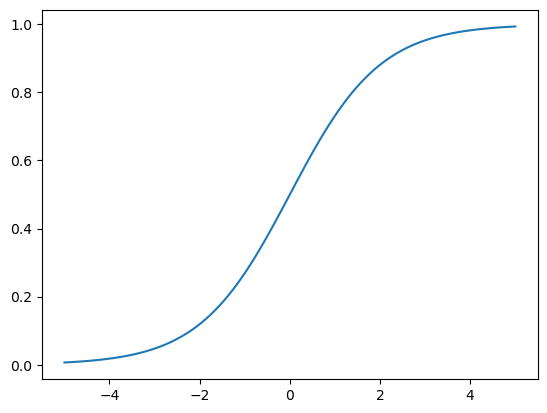

In [139]:
# exponential Functions
x = np.linspace(-5,5,100)
sigmoid = 1/(1+np.exp(-x)) # (100,)
plt.plot(x, sigmoid)

In [140]:
# Hyperbolic Functions
# numpy.sinh(x), numpy.cosh(x), numpy.tanh(x)

x = np.linspace(0,1,5)

sinh, cosh = np.sinh(x), np.cosh(x)
tanh = np.tanh(x)

print(tanh.round(2))
print((sinh/cosh).round(2))

[0.   0.24 0.46 0.64 0.76]
[0.   0.24 0.46 0.64 0.76]


In [143]:
x = np.linspace(0,1,5)

sinh = np.sinh(x)
sinh_exp = (np.exp(x) - np.exp(-x))/2

cosh = np.cosh(x)
cosh_exp = (np.exp(x) + np.exp(-x))/2

print(sinh, sinh_exp, sep='\n')
print(cosh, cosh_exp, sep='\n')

[0.         0.25261232 0.52109531 0.82231673 1.17520119]
[0.         0.25261232 0.52109531 0.82231673 1.17520119]
[1.         1.0314131  1.12762597 1.29468328 1.54308063]
[1.         1.0314131  1.12762597 1.29468328 1.54308063]


***Activation Function***

In [ ]:
# sigmoid
# tanh
# ReLU

import numpy as np
import matplolib.pyplot as plt

x = np.linspace(-3,3,100)
sigmoid = 1/(1+np.exp(-x))
tanh = np.tanh(x)
relu = np.maximum(x,0)

In [146]:
# np.max ==> 최댓값 하나만 뽑음
# np.maximum ==> 행렬 끼리의 비교를 통해 큰 값 추출
x = np.random.uniform(-3,3,(10,))
print(x.round(3))
print('-'*40)
print(np.maximum(x,0).round(3))

[ 0.363 -0.362  1.542  1.266  2.222  2.26  -0.598  0.592  2.548 -2.749]
----------------------------------------
[0.363 0.    1.542 1.266 2.222 2.26  0.    0.592 2.548 0.   ]


## 멱함수 (power function)

In [149]:
# numpy.square
import numpy as np
a = np.random.randint(0,10,(10,))
square1 = a*a
square2 = a**2
square3 = np.square(a)
print(square1, square2, square3, sep='\n')

[ 1  4  4 36  0 36 81 81  9 81]
[ 1  4  4 36  0 36 81 81  9 81]
[ 1  4  4 36  0 36 81 81  9 81]


In [150]:
# numpy.sqrt, numpy.cbrt
a = np.random.randint(0,10,(4,))
sqrt1 = a**(1/2)
sqrt2 = np.sqrt(a)

cbrt1 = a**(1/3)
cbrt2 = np.cbrt(a)

print(sqrt1, sqrt2, sep='\n')

[1.41421356 2.44948974 2.44948974 3.        ]
[1.41421356 2.44948974 2.44948974 3.        ]


In [151]:
# 분수함수 numpy.reciprocal(x)
a = np.random.uniform(0,10,(4,))
recip1 = 1/a
recip2 = a**(-1)
recip3 = np.reciprocal(a)

print(recip1, recip2, recip3, sep='\n')

[0.23485367 5.18134022 0.21860398 0.1122571 ]
[0.23485367 5.18134022 0.21860398 0.1122571 ]
[0.23485367 5.18134022 0.21860398 0.1122571 ]


In [153]:
# numpy.power(x1, x2)
a = np.random.uniform(0,5,(4,))
s1 = np.square(a).round(2)
s2 = (a**2).round(2)
s3 = np.power(a, 2).round(2)

print(s1, s2, s3, sep='\n')

[10.29 19.94  0.   14.98]
[10.29 19.94  0.   14.98]
[10.29 19.94  0.   14.98]


In [156]:
a = np.random.uniform(0,5,(4,))

y1 = 3*x**3 - 2*x**2 + x -2
y2 = 3*np.power(x, 3) - 2*np.power(x,2) + x - 2

print(y1, y2, sep='\n')

[ -1.75677168  -2.7646379    5.78165179   2.14284384  23.26223018
  24.67274818  -3.95238495  -1.48626431  37.17880136 -82.18962086]
[ -1.75677168  -2.7646379    5.78165179   2.14284384  23.26223018
  24.67274818  -3.95238495  -1.48626431  37.17880136 -82.18962086]


In [157]:
# exponentional function
a = np.random.uniform(0,5,(4,))

exp1 = np.exp(a).round(2)
exp2 = np.power(np.e, a).round(2)
print(exp1, exp2, sep='\n')

[50.65 93.13  1.37 47.15]
[50.65 93.13  1.37 47.15]


In [161]:
log_a = np.log1p(a)
exp_a = np.expm1(log_a)
print(a)
print(log_a)
print(exp_a)

[3.92491332 4.53400412 0.31516719 3.85330476]
[1.59430668 1.71091163 0.2739638  1.57965987]
[3.92491332 4.53400412 0.31516719 3.85330476]


## 로그 함수

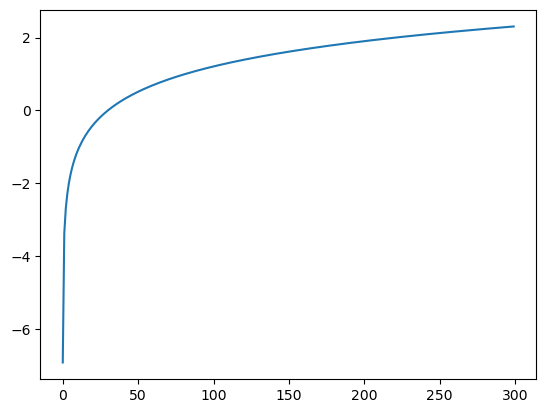

In [170]:
x = np.linspace(0.001, 10, 300) # 정의역 포함
log = np.log(x)
plt.plot(log)
plt.show()

In [171]:
a = np.random.uniform(1,5,(4,))
log = np.log(a)
exp = np.exp(log)

print(a)
print(log)
print(exp) # 역연산 

[4.05198885 3.32899152 1.93699499 3.74406376]
[1.39920784 1.20266941 0.6611378  1.32017159]
[4.05198885 3.32899152 1.93699499 3.74406376]


In [173]:
# log(a) + log(b) = log(ab)
a = np.random.uniform(1,5,(4,))
b = np.random.uniform(1,5,(4,))

print((np.log(a) + np.log(b)).round(3))
print(np.log(a*b).round(3))

[2.217 2.516 2.032 1.577]
[2.217 2.516 2.032 1.577]


In [ ]:
a = np.random.uniform(1,5,(4,))
log2 = np.log(a)/np.log(2) # base를 2로 맞춘 것이구나! 


In [175]:
# binary entropy
import numpy as np
p = np.random.uniform(0,1,(4,)) # 4개의 확률
# p = np.random.uniform(0.0001, 0.9999, (4,)) 0과 1을 빼고 설정할 때. 
be_e = -(p*np.log(p) + (1-p)*np.log(1-p))
be_2 = -(p*np.log(p)/np.log(2) + (1-p)*np.log(1-p)/np.log(2)) # base가 2

print('probability :\n', p)
print('base e :\n', be_e)
print('base 2 :\n', be_2)


probability :
 [0.19726723 0.50140223 0.02684466 0.53333406]
base e :
 [0.49659058 0.69314325 0.12359668 0.69092321]
base 2 :
 [0.71642877 0.99999433 0.17831232 0.99679149]


# 넘파이 API - 벡터, 행렬의 연산

## 벡터의 내적과 행렬의 곱셈

In [176]:
# 강의 분량을 확 줄였음. 

In [181]:
# Dot Product
# numpy.dot(a,b)
# 원소별 곱셈을 해주고 다 더해주는 것. 

u = np.random.uniform(0,5,(4,))
v = np.random.uniform(0,5,(4,))
print(u)
print(v, '\n')
sum_hadamard = np.sum(u*v)
np_dot = np.dot(u,v)

print(u*v)
print(sum_hadamard)
print(np_dot)

[0.88814109 2.50225409 2.44660246 0.95712758]
[2.304371   0.00311441 0.38556391 2.38115826] 

[2.04660657 0.00779305 0.94332161 2.27907223]
5.276793465173363
5.276793465173363


In [188]:
# operations of a artifical neuron
# vector에 대해서 np.dot()

x = np.random.uniform(0,5,(4,))
w = np.random.uniform(0,5,(4,))
b = np.random.uniform(0,5,())

affine = np.dot(x,w) + b
activation = 1/(1+np.exp(-affine))


[[0.534 4.667 1.407 0.64 ]
 [0.628 3.952 3.914 3.364]
 [4.89  4.857 3.628 4.204]
 [3.882 0.386 3.157 2.07 ]
 [2.446 1.107 0.147 4.495]]
[[4.614 3.706 3.718 4.169 1.559]
 [4.1   3.383 3.938 4.268 4.451]
 [0.106 2.309 4.744 2.885 3.58 ]
 [1.674 0.464 2.883 2.138 0.125]]


array([[22.819, 21.313, 28.882, 27.569, 26.722],
       [25.147, 26.295, 46.166, 37.967, 33.002],
       [49.899, 44.882, 66.643, 60.57 , 42.76 ],
       [23.292, 23.942, 36.9  , 31.364, 19.333],
       [23.366, 15.236, 27.114, 24.958,  9.834]])

In [191]:
# matrices&vector np.dot

M = np.random.uniform(0,5, (3,4))
u = np.random.uniform(0,5, (4,))

mat_vec_mul = np.empty(3,) # 빈공간 만들기
for row_idx, row in enumerate(M):
    mat_vec_mul[row_idx] = np.dot(row, u)
    
np_matmul = np.matmul(M,u)
print(mat_vec_mul.round(2))
print(np_matmul.round(2))

[21.71 33.26 21.56]
[21.71 33.26 21.56]


In [199]:
# numpy.matmul 두개의 행렬을 곱함
M = np.random.uniform(0,5,(3,4))
N = np.random.uniform(0,5,(4,5))
mat_mat_mul = np.empty((3,5))
for M_row_idx in range(3):
    for N_col_idx in range(5):
        dot_prod = np.dot(M[M_row_idx, :], N[:,N_col_idx])
        mat_mat_mul[M_row_idx, N_col_idx] = dot_prod
        
np_matmul = np.matmul(M, N)
        
print(mat_mat_mul)
print('-'*65)
print(np_matmul)
print('-'*65)
print(np.dot(M,N))

[[20.67190379 21.68005392 17.66939818 16.72115942 28.97229069]
 [30.18765443 35.21358094 24.55447682 28.1021494  47.99077173]
 [37.48144231 37.5126268  30.12006552 29.51642993 52.38164793]]
-----------------------------------------------------------------
[[20.67190379 21.68005392 17.66939818 16.72115942 28.97229069]
 [30.18765443 35.21358094 24.55447682 28.1021494  47.99077173]
 [37.48144231 37.5126268  30.12006552 29.51642993 52.38164793]]
-----------------------------------------------------------------
[[20.67190379 21.68005392 17.66939818 16.72115942 28.97229069]
 [30.18765443 35.21358094 24.55447682 28.1021494  47.99077173]
 [37.48144231 37.5126268  30.12006552 29.51642993 52.38164793]]


In [200]:
# operations of Artificial Neurons
import numpy as np

X = np.random.uniform(0,5,(3,4))

W = np.random.uniform(0,5,(4,5))
b = np.random.uniform(0,5,())

# affine = np.matmul(X, W) + b
affine = np.dot(X,W) + b # 더해지는 것 자체가 broadcasting되어서 더해짐. 
activation = 1/(1+np.exp(-affine))

